In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



In [99]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',500)

In [100]:
df_client=pd.read_csv(r'C:\Users\Naila-PC\Downloads\client_data.csv')

In [101]:
df_client.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


In [102]:
df_price=pd.read_csv(r'C:\Users\Naila-PC\Downloads\price_data.csv')

In [103]:
df_price.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


In [104]:
# Preprocessing
#EDA


In [105]:
#check missing values,data types and unique values
def col_info(df):
    cols=[]
    dtypes=[]
    nunique=[]
    null=[]
    for col in df.columns:
        cols.append(col)
        dtypes.append(df[col].dtypes)
        nunique.append(df[col].nunique())
        null.append(df[col].isnull().sum())
    return pd.DataFrame({"Columns": cols,
                             "Data Types":dtypes,
                             "Number of unique values":nunique,
                             "Number of missing values":null})


In [106]:
col_info(df_client)

,Columns,Data Types,Number of unique values,Number of missing values
0,id,object,14606,0
1,channel_sales,object,8,0
2,cons_12m,int64,11065,0
3,cons_gas_12m,int64,2112,0
4,cons_last_month,int64,4751,0
5,date_activ,object,1796,0
6,date_end,object,368,0
7,date_modif_prod,object,2129,0
8,date_renewal,object,386,0
9,forecast_cons_12m,float64,13993,0


In [107]:
col_info(df_price)

,Columns,Data Types,Number of unique values,Number of missing values
0,id,object,16096,0
1,price_date,object,12,0
2,price_off_peak_var,float64,1853,0
3,price_peak_var,float64,1189,0
4,price_mid_peak_var,float64,711,0
5,price_off_peak_fix,float64,66,0
6,price_peak_fix,float64,31,0
7,price_mid_peak_fix,float64,28,0


In [108]:
df_client.duplicated().sum()

0

In [109]:
df_price.duplicated().sum()

0

In [110]:
# Numeric Variables
numeric_variables = [col for col in df_client.columns if df_client[col].dtype != "object"
                        and df_client[col].nunique() >11
                        and col not in "id"]
numeric_variables

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_off_peak',
 'forecast_price_energy_peak',
 'forecast_price_pow_off_peak',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'num_years_antig',
 'pow_max']

In [111]:
# categorical Variables
categorical_variables = [col for col in df_client.columns if col in "O"
                        or df_client[col].nunique() <=11
                        and col not in "churn"]

categorical_variables

['channel_sales', 'has_gas', 'nb_prod_act', 'origin_up']

In [112]:
 # Transform date columns to datetime type 
for i in ['date_activ','date_end','date_modif_prod','date_renewal']:
    df_client[i]=pd.to_datetime(df_client[i])
    

In [113]:
df_price['price_date'] = pd.to_datetime(df_price['price_date'])


In [114]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

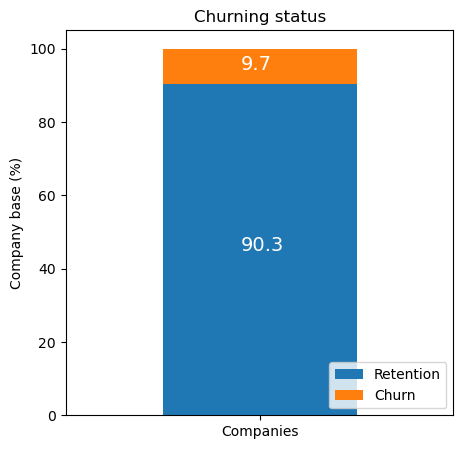

In [115]:
churn = df_client[['id', 'churn']]
churn.columns = ['Companies', 'churn']
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

In [116]:
df_client['churn'].value_counts()

0    13187
1     1419
Name: churn, dtype: int64

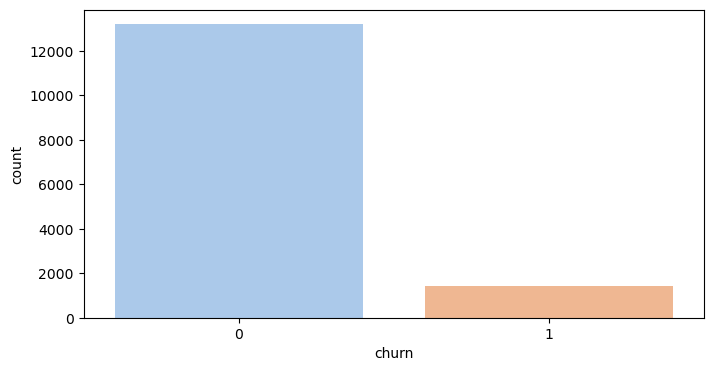

In [117]:
plt.figure(figsize=(8,4))
sns.countplot(x=df_client['churn'],palette='pastel');

In [118]:
#Desctrictive statistics
df_client.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [119]:
df_price.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Approximately 10% of total customers have churned, it is imbalanced dataset, so in the modeling process, we need to handle this problem.

In [120]:
# To determine the threshold value for outliers
def outlier_thresholds(dataframe, variable, low_quantile=0.05, up_quantile=0.95):
    quantile_one = dataframe[variable].quantile(low_quantile)
    quantile_three = dataframe[variable].quantile(up_quantile)
    interquantile_range = quantile_three - quantile_one
    up_limit = quantile_three + 1.5 * interquantile_range
    low_limit = quantile_one - 1.5 * interquantile_range
    return low_limit, up_limit

In [121]:
# Are there any outliers in the variables
def has_outliers(dataframe, numeric_columns, plot=True):
   # variable_names = []
    for col in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, " : ", number_of_outliers, "outliers")
            #variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    #return variable_names

cons_12m  :  278 outliers


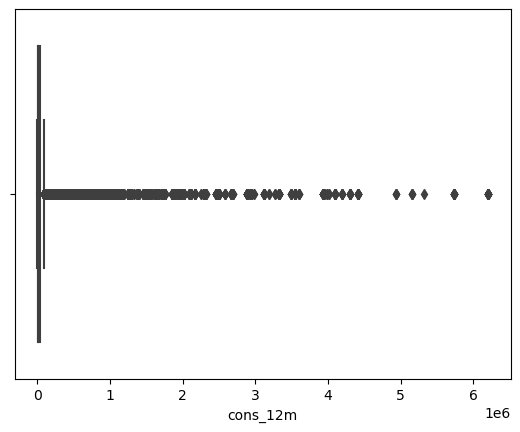

cons_12m : None Outliers
cons_gas_12m  :  462 outliers


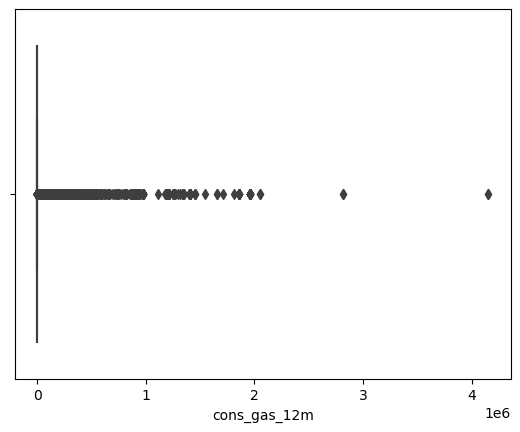

cons_gas_12m : None Outliers
cons_last_month  :  338 outliers


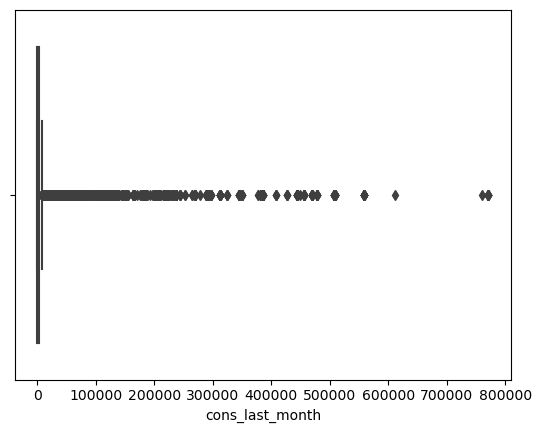

cons_last_month : None Outliers
forecast_cons_12m  :  39 outliers


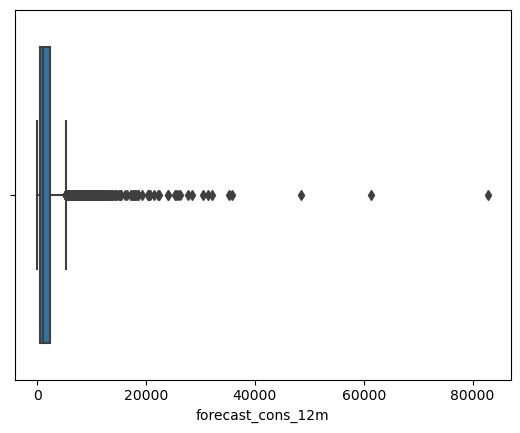

forecast_cons_12m : None Outliers
forecast_cons_year  :  72 outliers


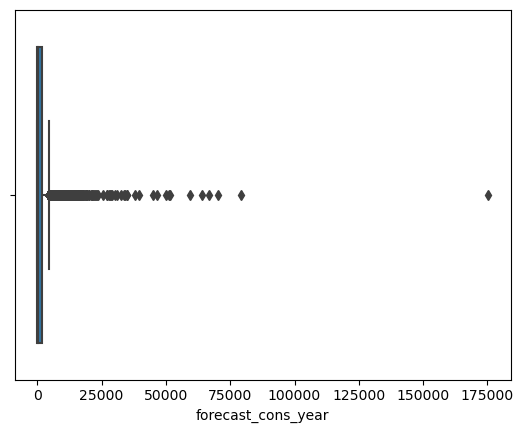

forecast_cons_year : None Outliers
forecast_discount_energy  :  512 outliers


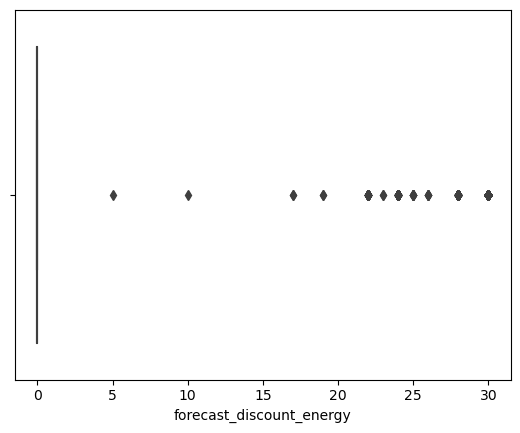

forecast_discount_energy : None Outliers
forecast_meter_rent_12m  :  39 outliers


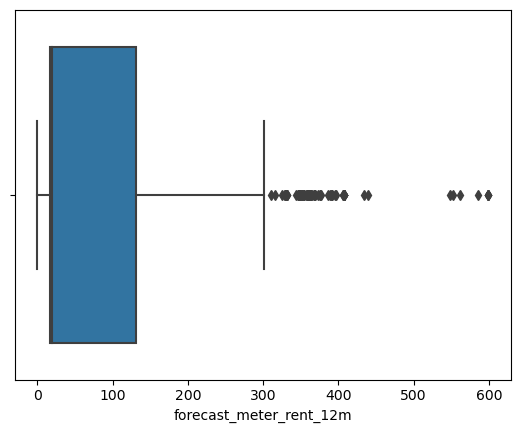

forecast_meter_rent_12m : None Outliers
forecast_price_energy_off_peak  :  136 outliers


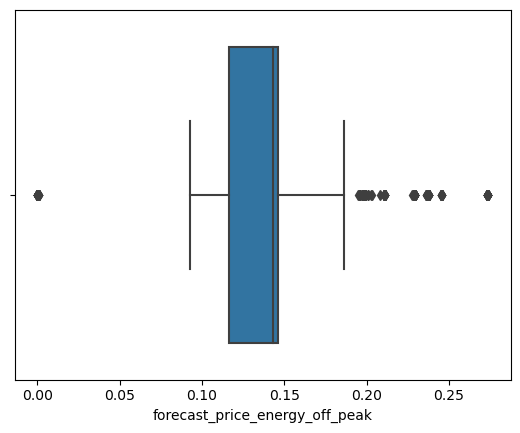

forecast_price_energy_off_peak : None Outliers
forecast_price_energy_peak : None Outliers
forecast_price_pow_off_peak  :  331 outliers


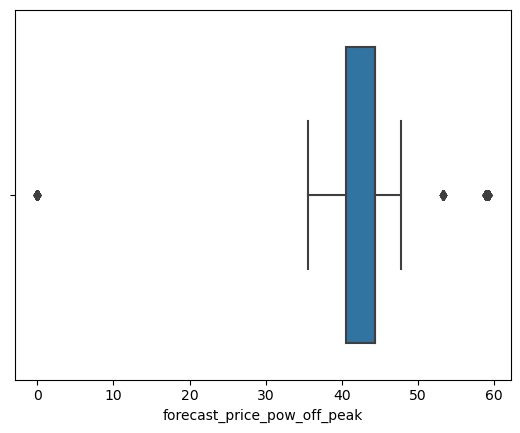

forecast_price_pow_off_peak : None Outliers
imp_cons  :  76 outliers


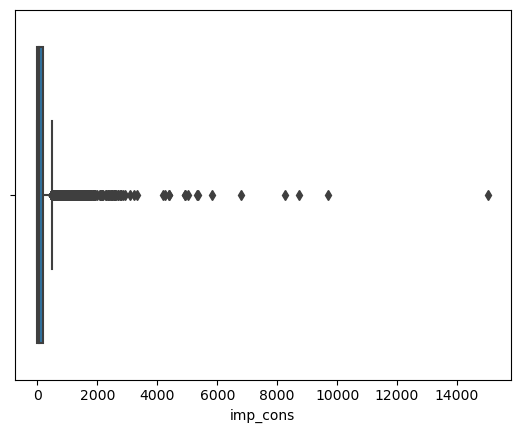

imp_cons : None Outliers
margin_gross_pow_ele  :  111 outliers


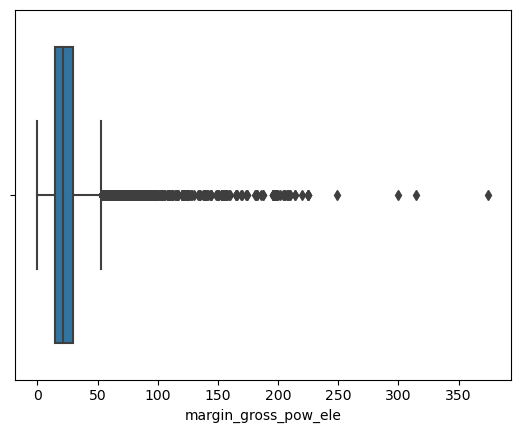

margin_gross_pow_ele : None Outliers
margin_net_pow_ele  :  111 outliers


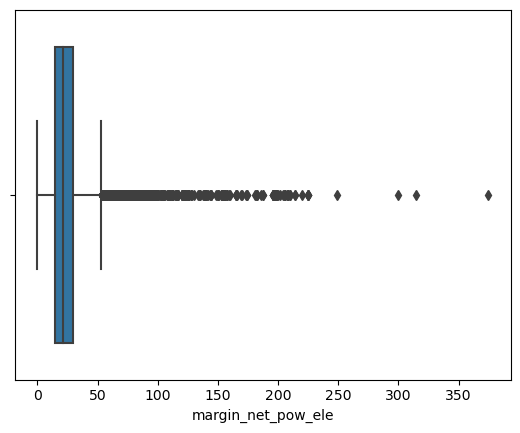

margin_net_pow_ele : None Outliers
net_margin  :  41 outliers


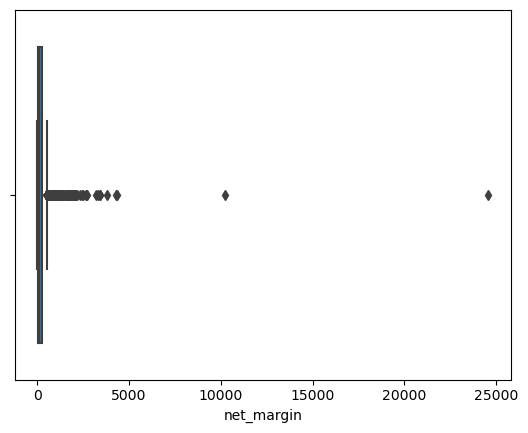

net_margin : None Outliers
num_years_antig : None Outliers
pow_max  :  89 outliers


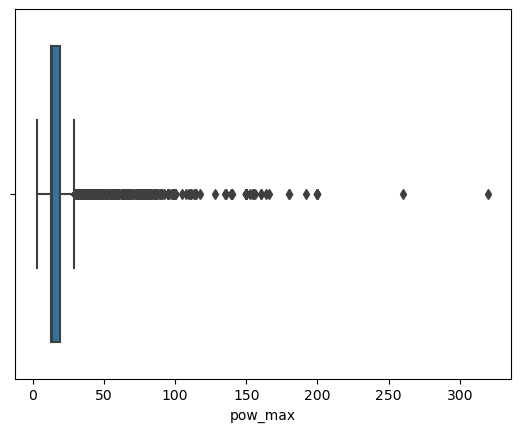

pow_max : None Outliers


In [122]:
# There is no outlier
for var in numeric_variables:
    print(var, ":",has_outliers(df_client, [var]),  "Outliers")

CONSUMPTION

In [123]:
consumption = df_client[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons"]]

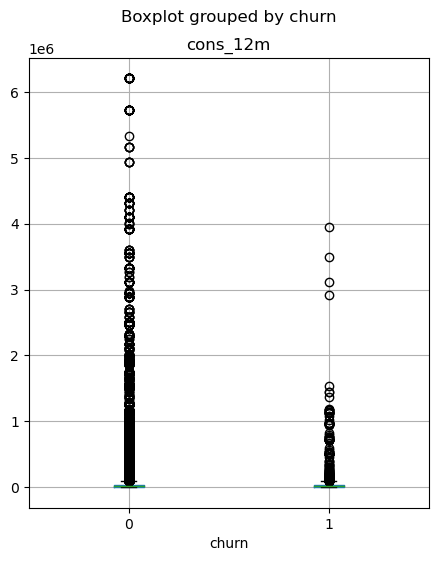

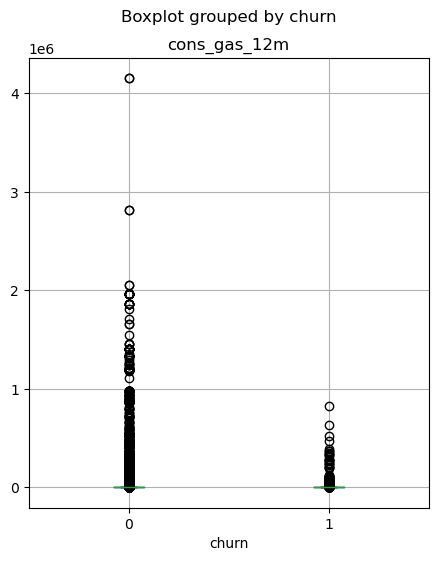

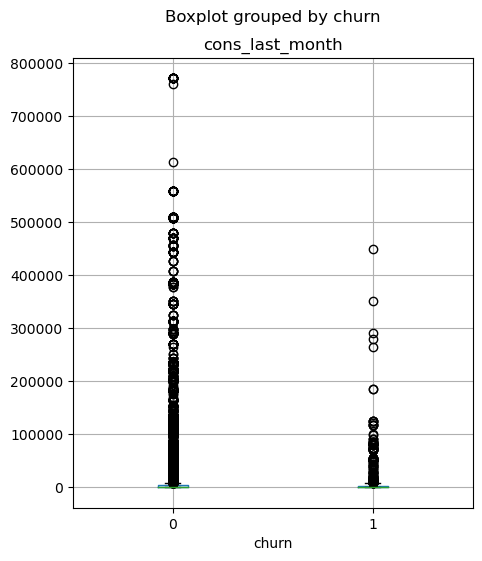

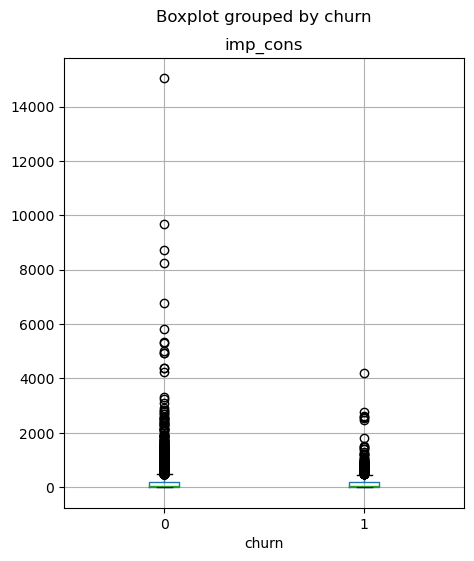

In [124]:
for i in consumption:
    df_client.boxplot(column=i, by='churn', figsize=(5,6))
    plt.title(i)
plt.show()

In [125]:
consumption = df_client[["cons_12m", "cons_gas_12m", "cons_last_month", "imp_cons","has_gas","churn"]]

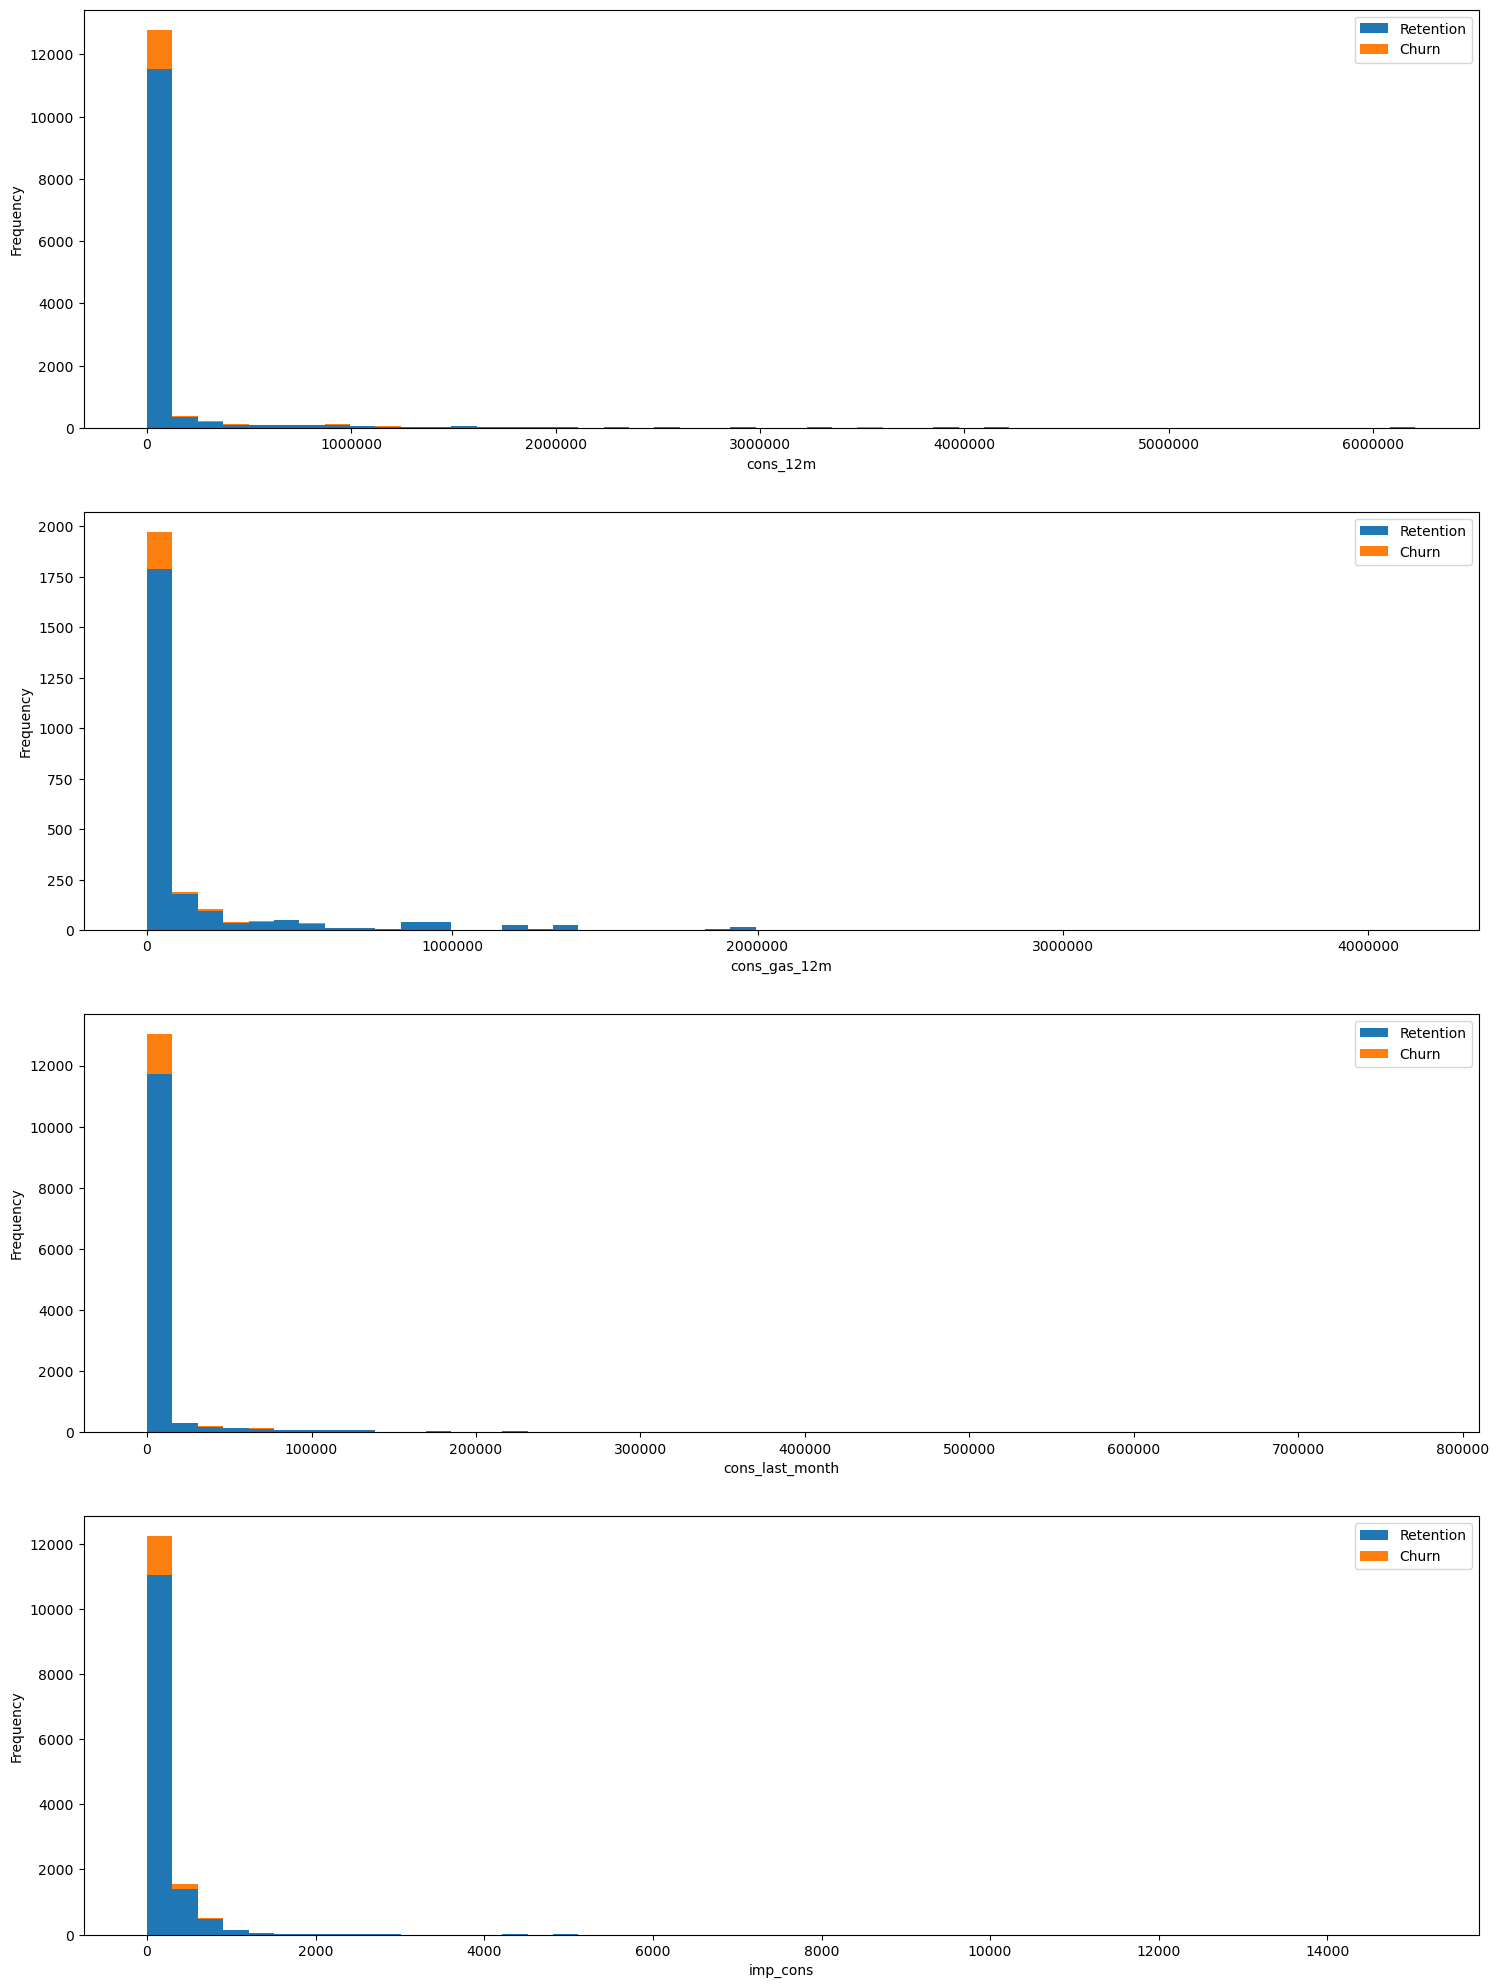

In [126]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

According to subplots we can say consumption data  is highly-skewed (left) and there are high number of outliers. We will focus on them in next task.

Forecast columns

In [127]:
forecast = df_client[["forecast_cons_12m", "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak", "forecast_price_pow_off_peak"]]

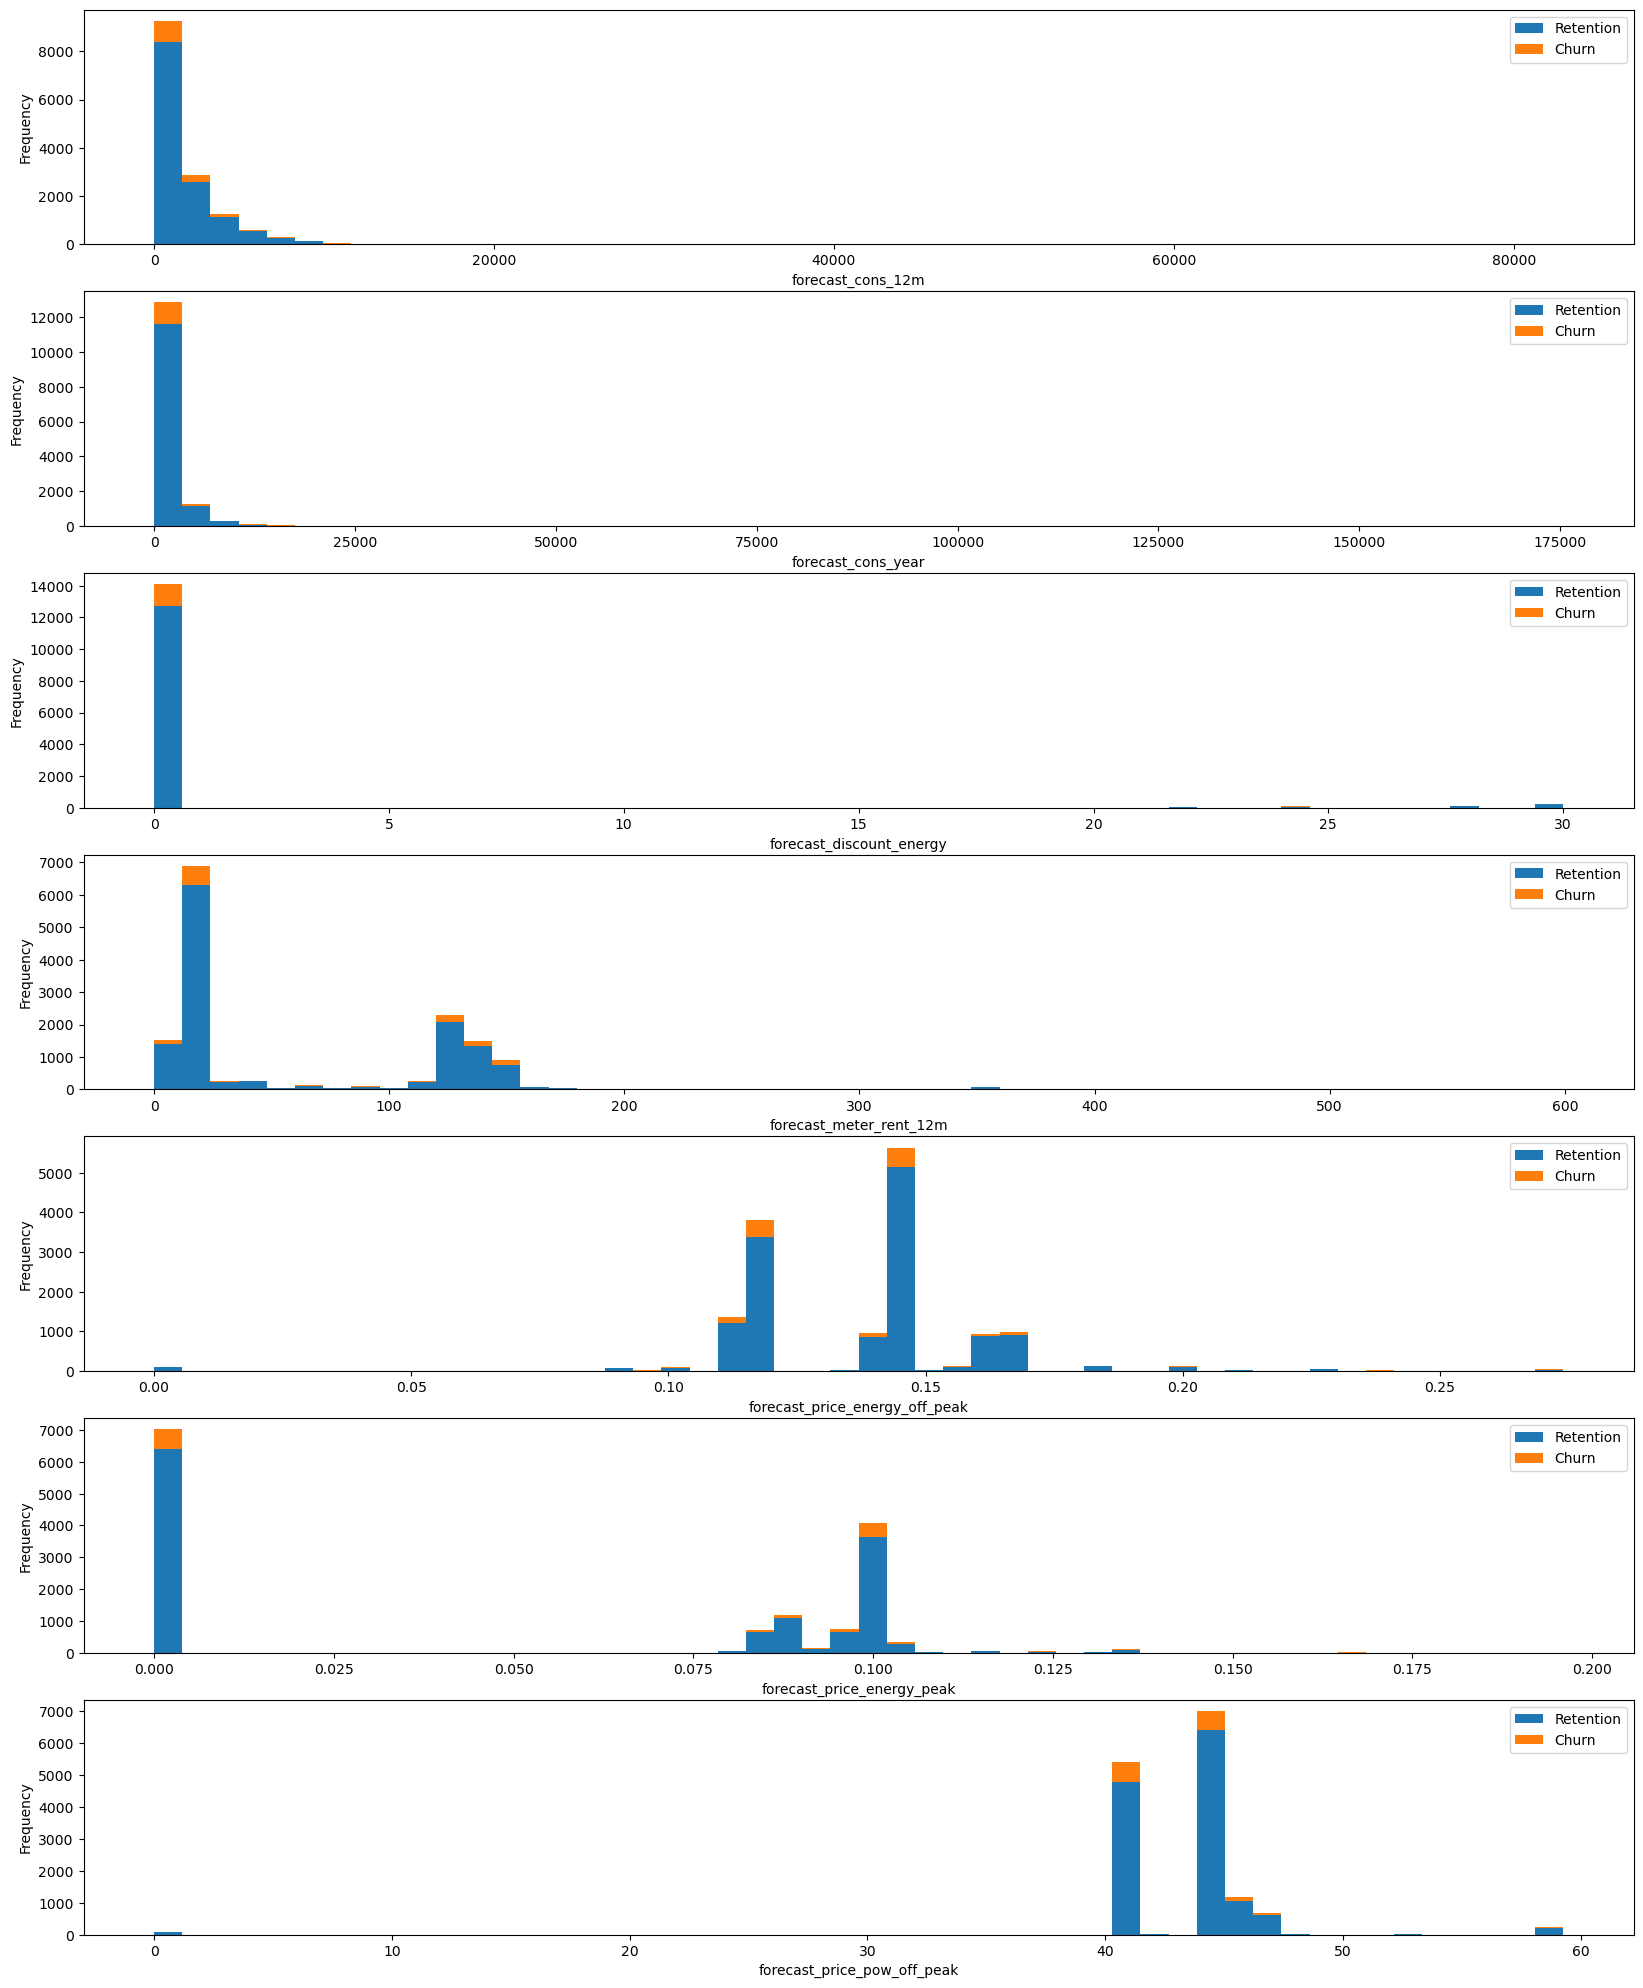

In [128]:

fig,axs=plt.subplots(nrows=7,figsize=(20,25))
plot_distribution(df_client,"forecast_cons_12m",axs[0])
plot_distribution(df_client, "forecast_cons_year", axs[1])
plot_distribution(df_client, "forecast_discount_energy", axs[2])
plot_distribution(df_client, "forecast_meter_rent_12m", axs[3])
plot_distribution(df_client, "forecast_price_energy_off_peak", axs[4])
plot_distribution(df_client, "forecast_price_energy_peak", axs[5])
plot_distribution(df_client, "forecast_price_pow_off_peak", axs[6])
    

Sale Channels

Values of "channel_sales" and "origin_up" dont make any sense, so in next step we will  convert these features to numeric data type by  encoding.


In [129]:
channel=df_client[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)  

In [130]:
channel_churn=(channel.div(channel.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

Text(0, 0.5, 'Percent(%)')

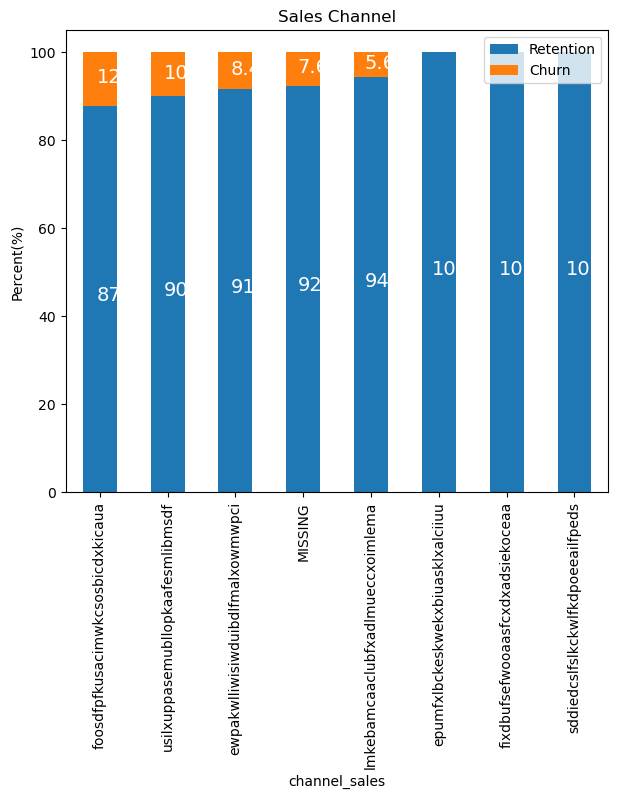

In [131]:
ax=channel_churn.plot(kind='bar',stacked=True,figsize=(7,6))
annotate_stacked_bars(ax, textsize=14)
plt.title('Sales Channel')
plt.legend(['Retention','Churn'],loc='upper right')
plt.ylabel('Percent(%)')

5 Sale channels have churn rate

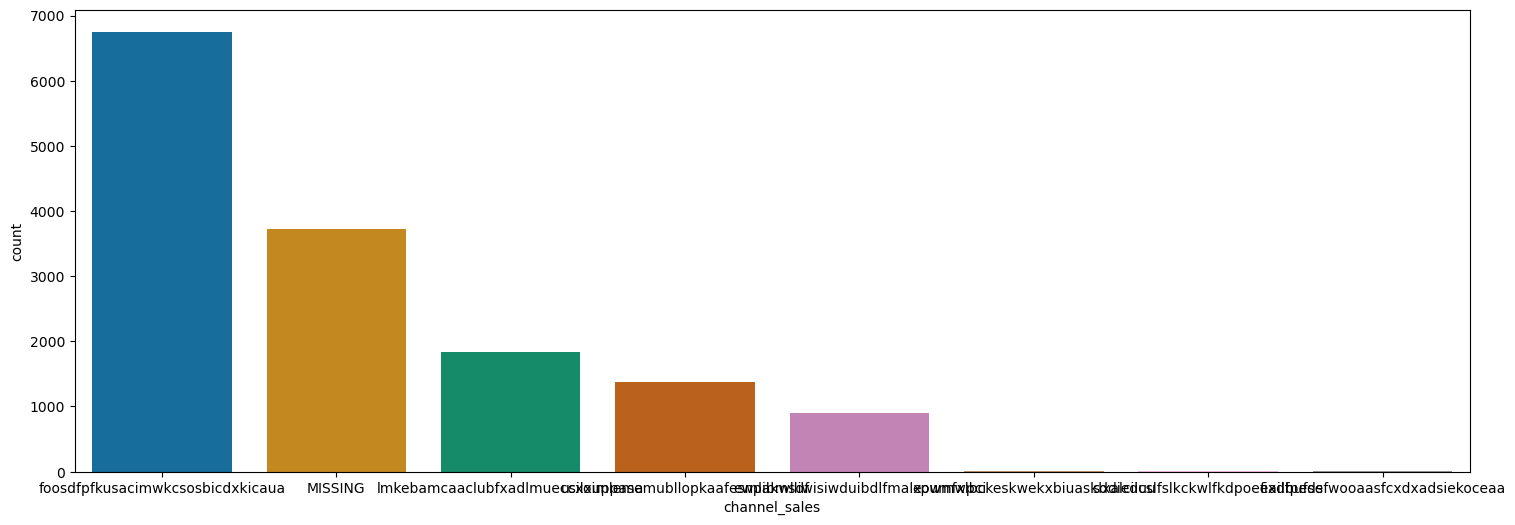

In [132]:
plt.figure(figsize=(18,6))
sns.countplot(x=df_client['channel_sales'],palette='colorblind');

And  number 4 is the most common sales channel

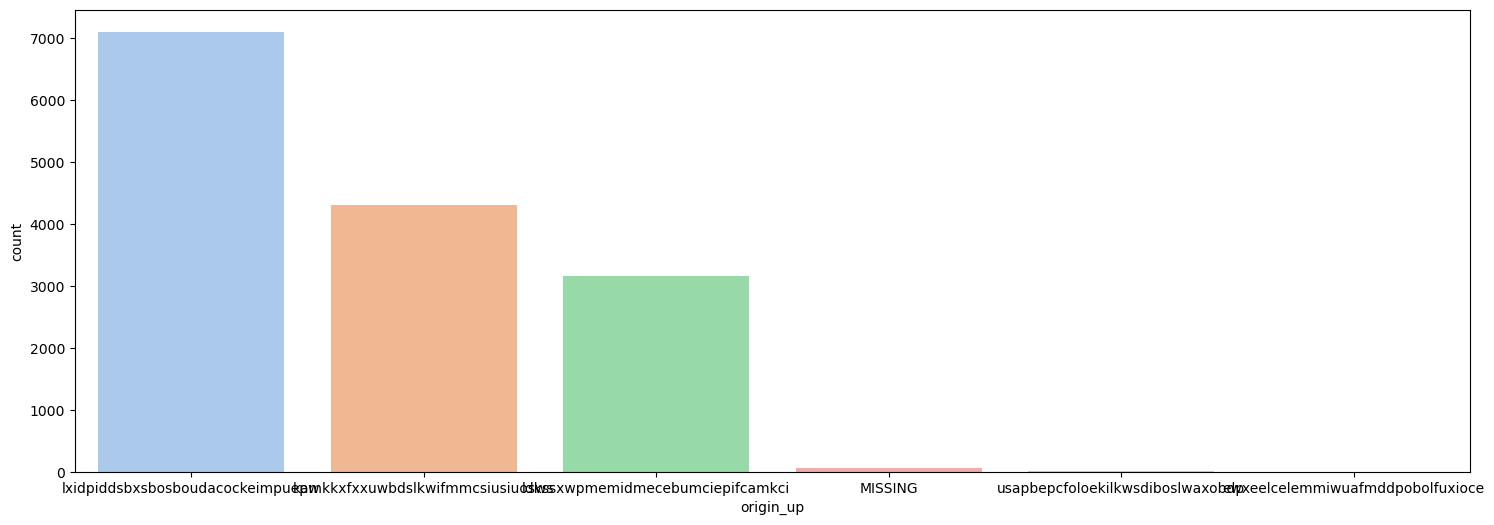

In [133]:
plt.figure(figsize=(18,6))
sns.countplot(x=df_client['origin_up'],palette="pastel");

In [134]:
df_client['start_year'] = df_client['date_activ'].dt.year
df_client['end_year'] = df_client['date_end'].dt.year

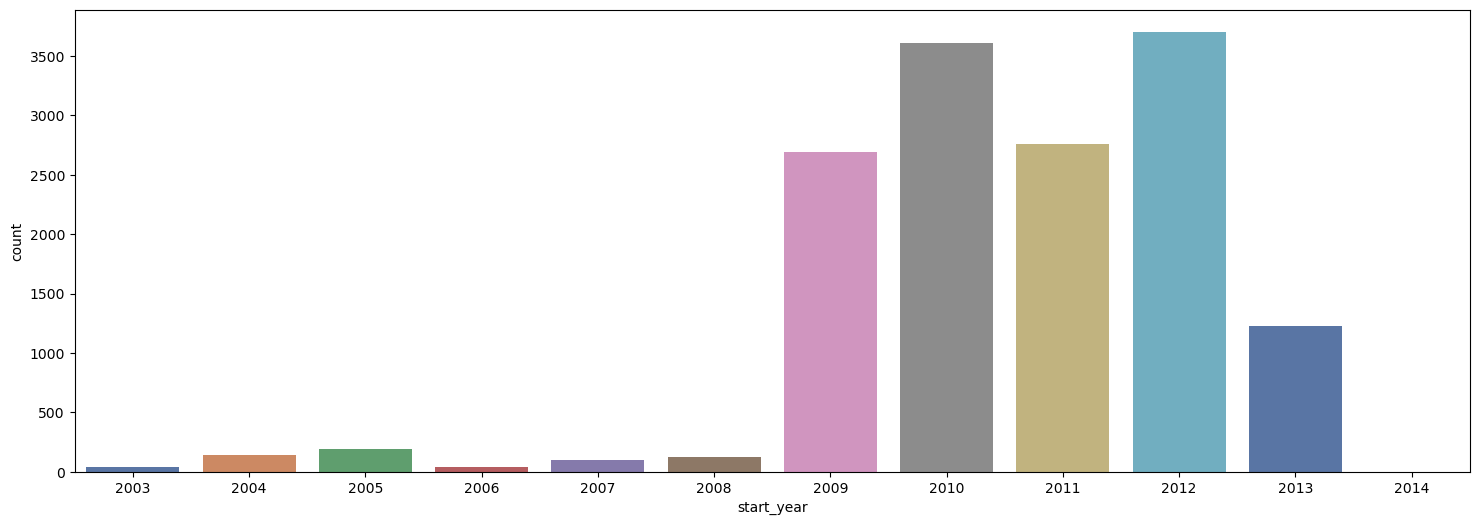

In [135]:
plt.figure(figsize=(18,6))
sns.countplot(x=df_client['start_year'],palette="deep");

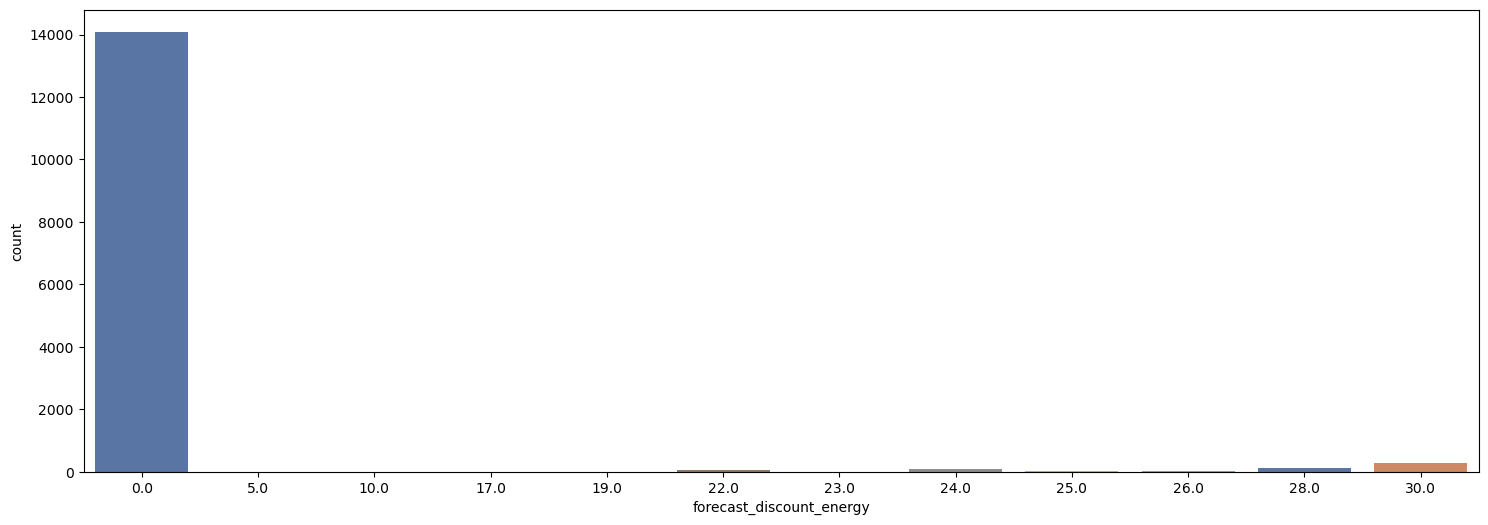

In [136]:
plt.figure(figsize=(18,6))
sns.countplot(x=df_client['forecast_discount_energy'],palette="deep");

In [137]:
date=df_client[['id', 'start_year', 'churn']]

In [138]:
date = date.groupby([date['start_year'], date['churn']])['id'].count().unstack(level=1).fillna(0)

In [139]:
date_churn=(date.div(date.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)

Text(0, 0.5, 'Percent(%)')

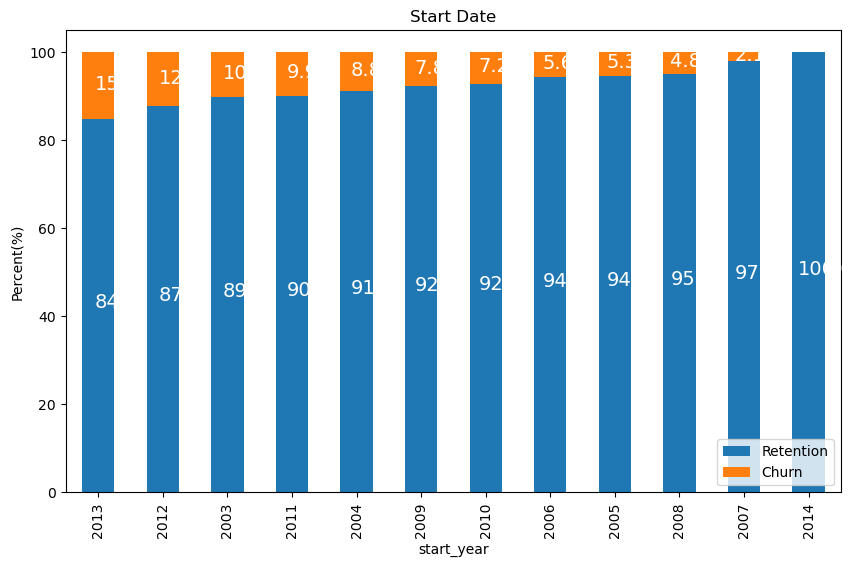

In [140]:
ax=date_churn.plot(kind='bar',stacked=True,figsize=(10,6))
annotate_stacked_bars(ax, textsize=14)
plt.title('Start Date')
plt.legend(['Retention','Churn'],loc='lower right')
plt.ylabel('Percent(%)')

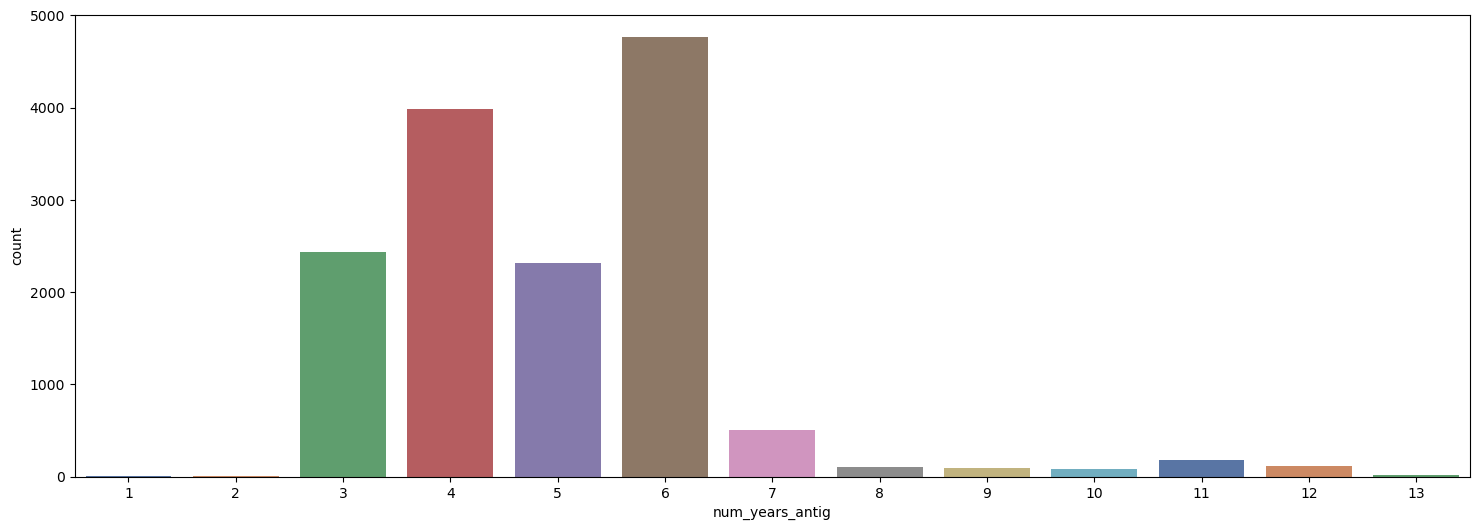

In [141]:
plt.figure(figsize=(18,6))
sns.countplot(x=df_client['num_years_antig'],palette="deep");

In [142]:
df_client['has_gas']=df_client['has_gas'].apply(lambda x:0 if x=='f' else 1)

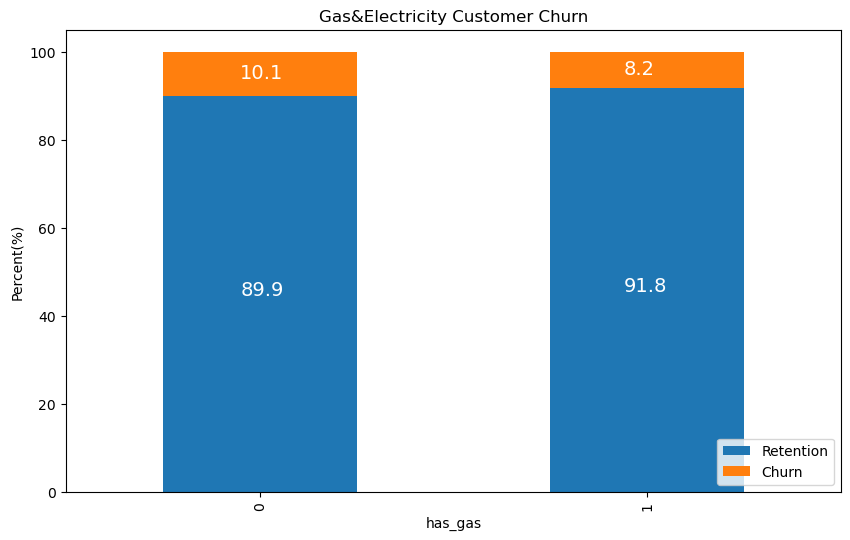

In [143]:
gas_or = df_client[['has_gas', 'id','churn']]
gas_or =gas_or.groupby([df_client['has_gas'], df_client['churn']])['id'].count().unstack(level=1).fillna(0)
has_gas_churn=(gas_or.div(gas_or.sum(axis=1),axis=0)*100).sort_values(by=[1],ascending=False)
ax=has_gas_churn.plot(kind='bar',stacked=True,figsize=(10,6))
annotate_stacked_bars(ax, textsize=14)
plt.title('Gas&Electricity Customer Churn')
plt.legend(['Retention','Churn'],loc='lower right')
plt.ylabel('Percent(%)');

A Number of non-gas (Electricity) clients  churned  are higher than electricity and gas clients together.

In [144]:
min_max_mean = ['max', 'min', 'mean']
price_features = ['price_off_peak_var','price_peak_var','price_mid_peak_var','price_off_peak_fix','price_peak_fix','price_mid_peak_fix']
price_stics = df_price.drop(columns=['price_date']).groupby(['id']).agg({'price_off_peak_var': min_max_mean, 'price_peak_var': min_max_mean, 'price_mid_peak_var': min_max_mean,
                                                      'price_off_peak_fix': min_max_mean, 'price_peak_fix': min_max_mean, 'price_mid_peak_fix': min_max_mean,})

In [145]:
price_stics.head(3)

price_off_peak_var                     price_peak_var                     price_mid_peak_var                    price_off_peak_fix                       price_peak_fix                       price_mid_peak_fix                      
                                                max       min      mean            max       min      mean                max       min     mean                max        min       mean            max        min       mean                max        min       mean
id                                                                                                                                                                                                                                                                     
0002203ffbb812588b632b9e628cc38d           0.128067  0.119906  0.124338       0.105842  0.101673  0.103794           0.073773  0.070232  0.07316          40.728885  40.565969  40.701732       24.43733  24.339581  24.421038          16.291555  16.226389  16.280694
0004351ebdd665e6ee664792efc4fd13           0.148405  0.143943  0.146426       0.000000  0.000000  0.000000           0.000000  0.000000  0.00000          44.444710  44.266931  44.385450        0.00000   0.000000   0.000000           0.000000   0.000000   0.000000
0010bcc39e42b3c2131ed2ce55246e3c           0.205742  0.150837  0.181558       0.000000  0.000000  0.000000           0.000000  0.000000  0.00000          45.944710  44.444710  45.319710        0.00000   0.000000   0.000000           0.000000   0.000000   0.000000

In [146]:
price_stics.columns

MultiIndex([('price_off_peak_var',  'max'),
            ('price_off_peak_var',  'min'),
            ('price_off_peak_var', 'mean'),
            (    'price_peak_var',  'max'),
            (    'price_peak_var',  'min'),
            (    'price_peak_var', 'mean'),
            ('price_mid_peak_var',  'max'),
            ('price_mid_peak_var',  'min'),
            ('price_mid_peak_var', 'mean'),
            ('price_off_peak_fix',  'max'),
            ('price_off_peak_fix',  'min'),
            ('price_off_peak_fix', 'mean'),
            (    'price_peak_fix',  'max'),
            (    'price_peak_fix',  'min'),
            (    'price_peak_fix', 'mean'),
            ('price_mid_peak_fix',  'max'),
            ('price_mid_peak_fix',  'min'),
            ('price_mid_peak_fix', 'mean')],
           )

In [147]:
price_stics.columns = ['_'.join(x) for x in zip(price_stics.columns.get_level_values(0), price_stics.columns.get_level_values(1))]
price_stics = price_stics.reset_index()
price_stics.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [148]:
for i in price_features:
    price_stics[f'max_min_differ_{i}'] = price_stics[f'{i}_max'] - price_stics[f'{i}_min']

price_stics.head(3)

,id,price_off_peak_var_max,price_off_peak_var_min,price_off_peak_var_mean,price_peak_var_max,price_peak_var_min,price_peak_var_mean,price_mid_peak_var_max,price_mid_peak_var_min,price_mid_peak_var_mean,price_off_peak_fix_max,price_off_peak_fix_min,price_off_peak_fix_mean,price_peak_fix_max,price_peak_fix_min,price_peak_fix_mean,price_mid_peak_fix_max,price_mid_peak_fix_min,price_mid_peak_fix_mean,max_min_differ_price_off_peak_var,max_min_differ_price_peak_var,max_min_differ_price_mid_peak_var,max_min_differ_price_off_peak_fix,max_min_differ_price_peak_fix,max_min_differ_price_mid_peak_fix
0,0002203ffbb812588b632b9e628cc38d,0.128067,0.119906,0.124338,0.105842,0.101673,0.103794,0.073773,0.070232,0.07316,40.728885,40.565969,40.701732,24.43733,24.339581,24.421038,16.291555,16.226389,16.280694,0.008161,0.004169,0.003541,0.162916,0.097749,0.065166
1,0004351ebdd665e6ee664792efc4fd13,0.148405,0.143943,0.146426,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,44.444710,44.266931,44.385450,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004462,0.000000,0.000000,0.177779,0.000000,0.000000
2,0010bcc39e42b3c2131ed2ce55246e3c,0.205742,0.150837,0.181558,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,45.944710,44.444710,45.319710,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.054905,0.000000,0.000000,1.500000,0.000000,0.000000


In [149]:
price_var_year = df_price.groupby(["id", "price_date"]).mean().groupby(['id']).var().reset_index()

In [150]:
price_var_year = price_var_year.rename(columns = {
"price_off_peak_var": "price_p1_var_year",
"price_peak_var": "price_p2_var_year",
"price_mid_peak_var": "price_p3_var_year",
"price_off_peak_fix": "price_p1_fix_year",
"price_peak_fix": "price_p2_fix_year",
"price_mid_peak_fix": "price_p3_fix_year"
})

In [151]:
price_var_year["var_year_price_p1"] = price_var_year["price_p1_var_year"] + price_var_year["price_p1_fix_year"]
price_var_year["var_year_price_p2"] = price_var_year["price_p2_var_year"] + price_var_year["price_p2_fix_year"]
price_var_year["var_year_price_p3"] = price_var_year["price_p3_var_year"] + price_var_year["price_p3_fix_year"]

In [152]:
price_var_6m = df_price[df_price["price_date"] > "2015-06-01"].groupby(["id", "price_date"]).mean().groupby(["id"]).var().reset_index()

In [153]:
price_var_6m = price_var_6m.rename(columns = {
"price_off_peak_var": "price_p1_var_6m",
"price_peak_var": "price_p2_var_6m",
"price_mid_peak_var": "price_p3_var_6m",
"price_off_peak_fix": "price_p1_fix_6m",
"price_peak_fix": "price_p2_fix_6m",
"price_mid_peak_fix": "price_p3_fix_6m"
} )



In [154]:
price_var_6m["var_6m_price_p1"] = price_var_6m["price_p1_var_6m"] + price_var_6m["price_p1_fix_6m"]
price_var_6m["var_6m_price_p2"] = price_var_6m["price_p2_var_6m"] + price_var_6m["price_p2_fix_6m"]
price_var_6m["var_6m_price_p3"] = price_var_6m["price_p3_var_6m"] + price_var_6m["price_p3_fix_6m"]

In [155]:
price_var_3m = df_price[df_price["price_date"] > "2015-09-01"].groupby(["id", "price_date"]).mean().groupby(["id"]).var().reset_index()

In [156]:
price_var_3m = price_var_3m.rename(columns = {
"price_off_peak_var": "price_p1_var_3m",
"price_peak_var": "price_p2_var_3m",
"price_mid_peak_var": "price_p3_var_3m",
"price_off_peak_fix": "price_p1_fix_3m",
"price_peak_fix": "price_p2_fix_3m",
"price_mid_peak_fix": "price_p3_fix_3m"
} )


In [157]:
price_var_3m["var_3m_price_p1"] = price_var_3m["price_p1_var_3m"] + price_var_3m["price_p1_fix_3m"]
price_var_3m["var_3m_price_p2"] = price_var_3m["price_p2_var_3m"] + price_var_3m["price_p2_fix_3m"]
price_var_3m["var_3m_price_p3"] = price_var_3m["price_p3_var_3m"] + price_var_3m["price_p3_fix_3m"]

In [158]:
new_price_data=pd.merge(price_var_year,price_var_6m,on="id")
new_price_data1=pd.merge(new_price_data,price_var_3m,on="id")

In [159]:
new_price_data1.head()

,id,price_p1_var_year,price_p2_var_year,price_p3_var_year,price_p1_fix_year,price_p2_fix_year,price_p3_fix_year,var_year_price_p1,var_year_price_p2,var_year_price_p3,price_p1_var_6m,price_p2_var_6m,price_p3_var_6m,price_p1_fix_6m,price_p2_fix_6m,price_p3_fix_6m,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,price_p1_var_3m,price_p2_var_3m,price_p3_var_3m,price_p1_fix_3m,price_p2_fix_3m,price_p3_fix_3m,var_3m_price_p1,var_3m_price_p2,var_3m_price_p3
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,1.871602e-06,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000e+00,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000e+00,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0010ee3855fdea87602a5b7aba8e42de,0.000025,0.000007,1.627620e-07,7.238536e-03,0.002606,0.001158,0.007264,0.002613,0.001158,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000e+00,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's merge the new  price  dataset with churn variable to check price sensitivity ( correlation with churn)

In [160]:
price_new = pd.merge(new_price_data1, df_client[["id", "churn"]], on = "id")
price_new.head()

,id,price_p1_var_year,price_p2_var_year,price_p3_var_year,price_p1_fix_year,price_p2_fix_year,price_p3_fix_year,var_year_price_p1,var_year_price_p2,var_year_price_p3,price_p1_var_6m,price_p2_var_6m,price_p3_var_6m,price_p1_fix_6m,price_p2_fix_6m,price_p3_fix_6m,var_6m_price_p1,var_6m_price_p2,var_6m_price_p3,price_p1_var_3m,price_p2_var_3m,price_p3_var_3m,price_p1_fix_3m,price_p2_fix_3m,price_p3_fix_3m,var_3m_price_p1,var_3m_price_p2,var_3m_price_p3,churn
0,0002203ffbb812588b632b9e628cc38d,0.000016,0.000004,0.000002,4.021438e-03,0.001448,0.000643,0.004037,0.001452,0.000645,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0004351ebdd665e6ee664792efc4fd13,0.000005,0.000000,0.000000,7.661891e-03,0.000000,0.000000,0.007667,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0010bcc39e42b3c2131ed2ce55246e3c,0.000676,0.000000,0.000000,5.965909e-01,0.000000,0.000000,0.597267,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,00114d74e963e47177db89bc70108537,0.000005,0.000000,0.000000,3.490909e-13,0.000000,0.000000,0.000005,0.000000,0.000000,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.000003,0.000000,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0013f326a839a2f6ad87a1859952d227,0.000016,0.000004,0.000002,0.000000e+00,0.000000,0.000000,0.000016,0.000004,0.000002,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.000011,0.000003,4.860000e-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


C:\Users\Naila-PC\AppData\Local\Temp\ipykernel_11036\3677032306.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl=price_new.corr()


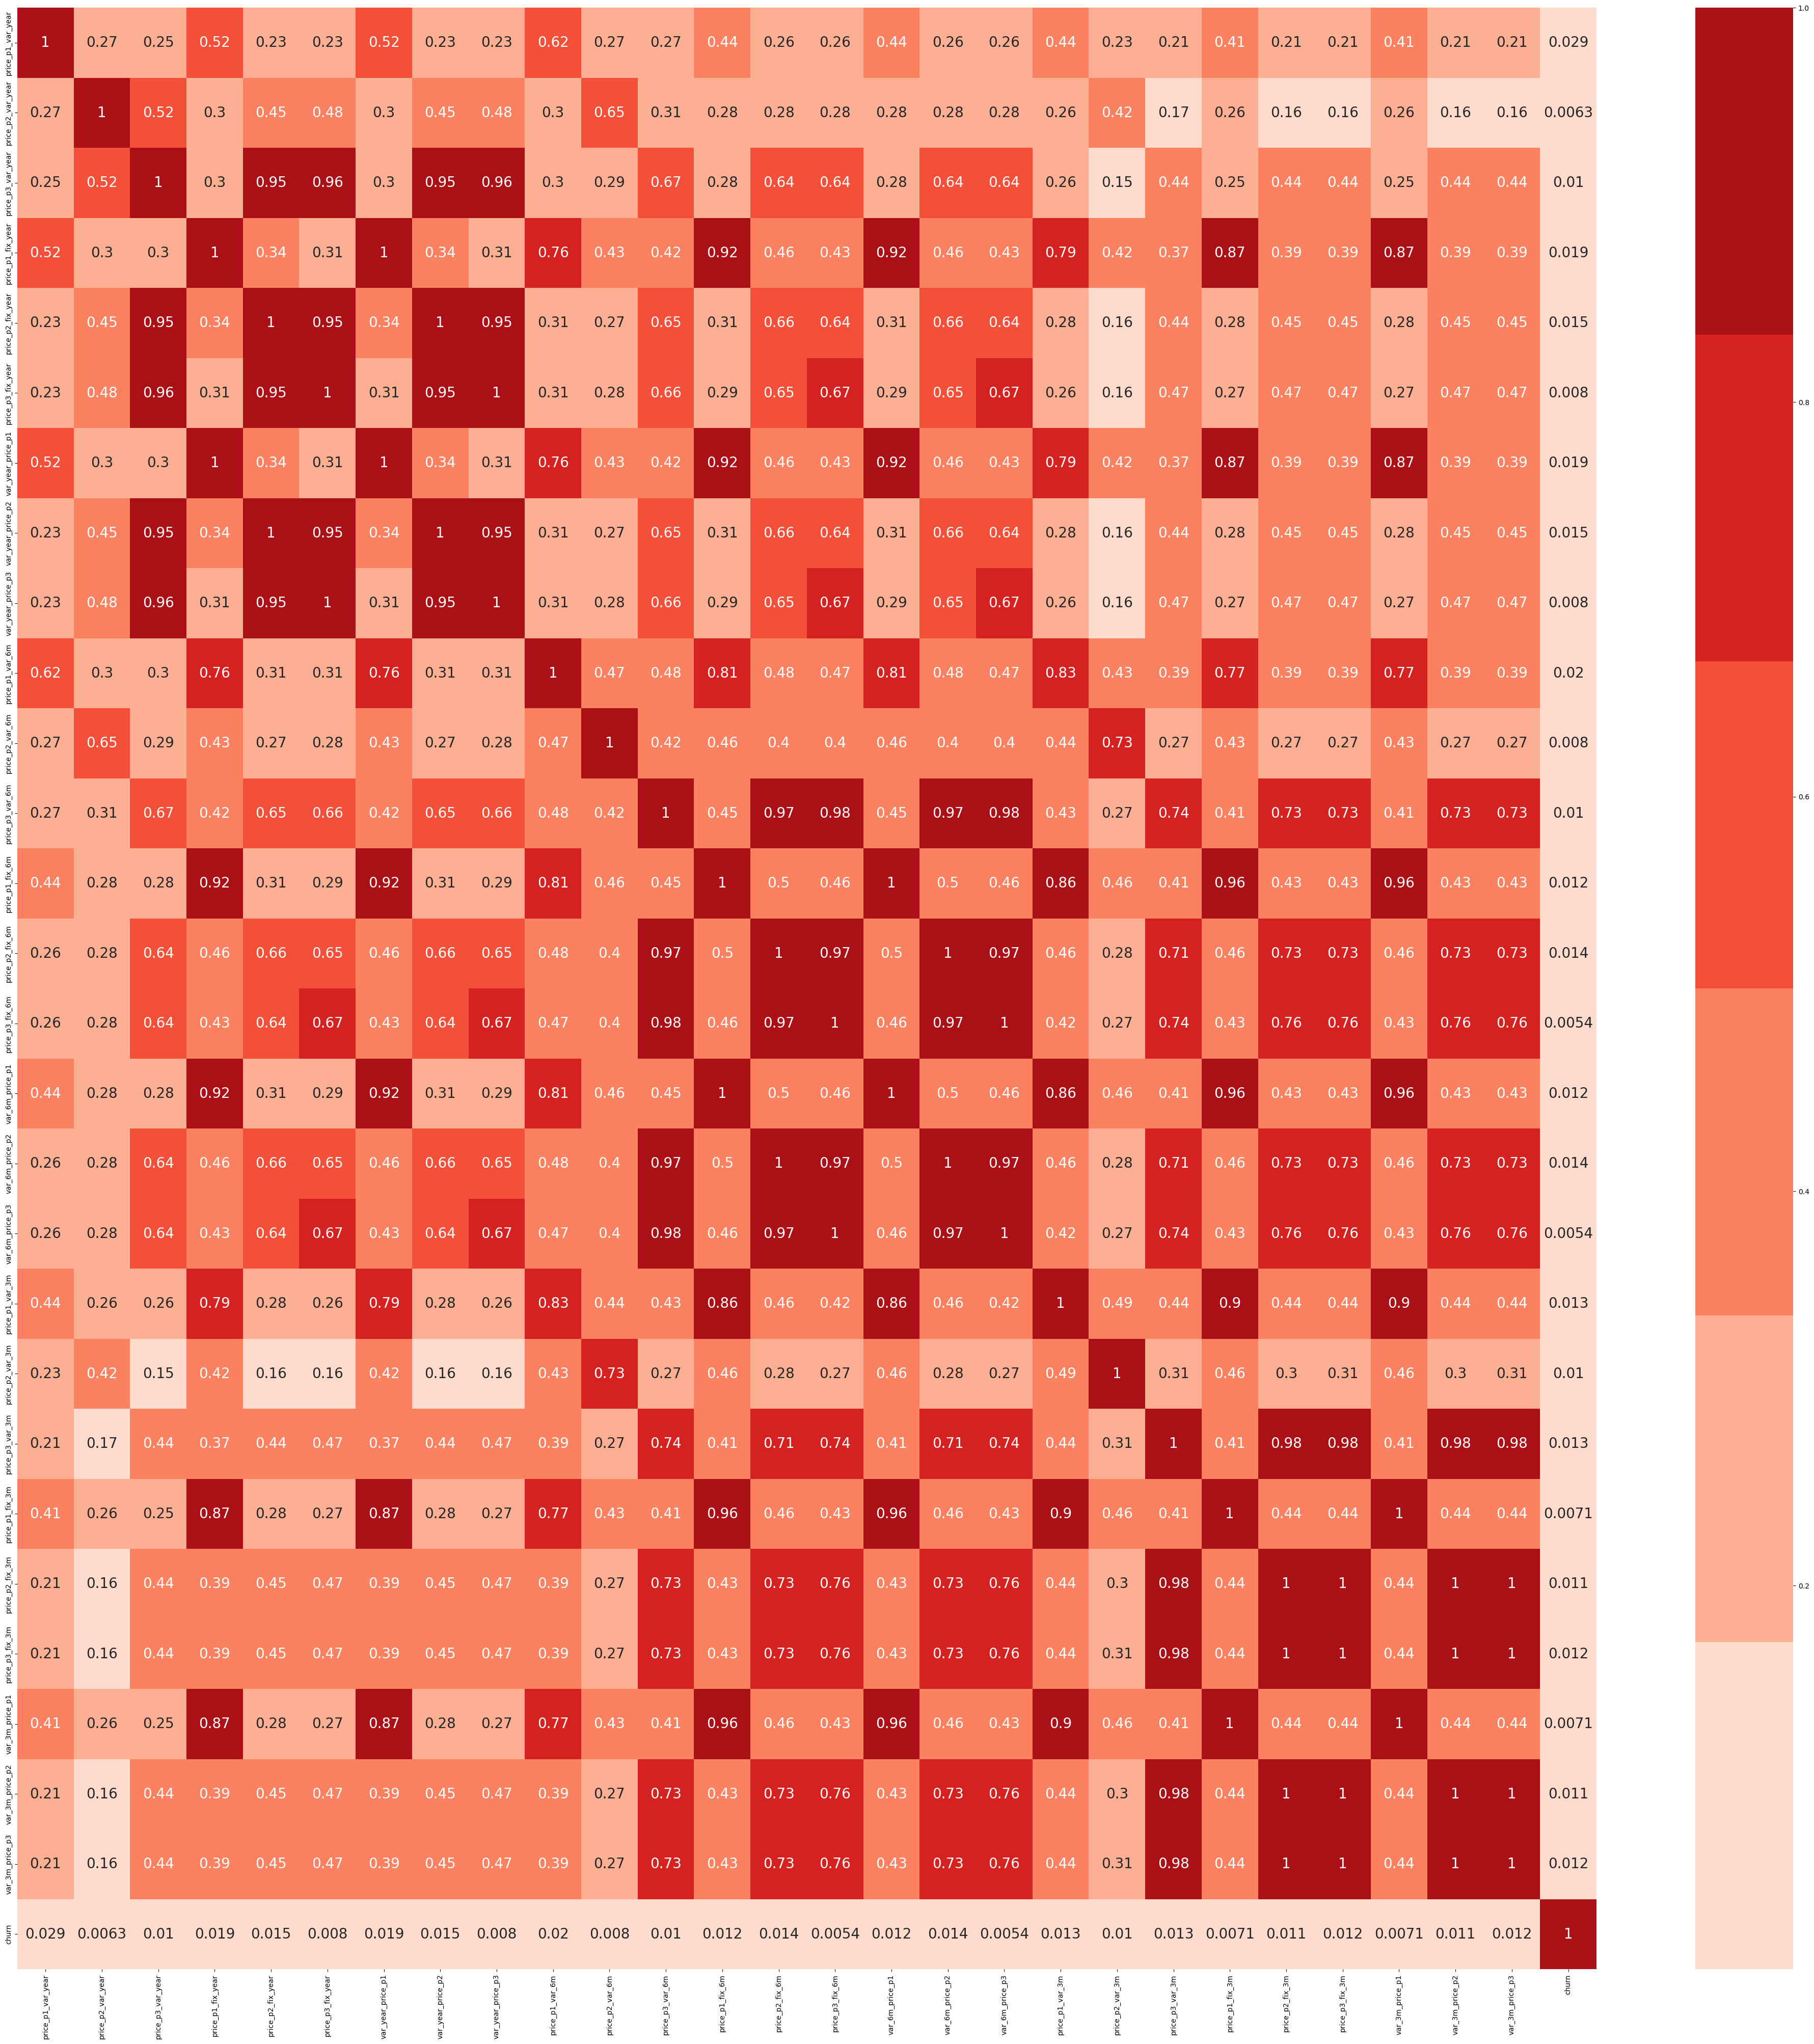

In [161]:
correl=price_new.corr()
plt.figure(figsize=(50,50))
colormap = sns.color_palette("Reds")
sns.heatmap(correl,annot=True,annot_kws={"size":20},cmap=colormap)
plt.show()

Correlation between churn and prices features is very low. According to that we can say churn is not sensitive to price change.

FINDINGS

1.We investigated prices at different times and checked the relationship of them with churned customers and proved that changes in prices does not affect customer churn.
2. Approximately 9.7% of customers has churned.
3. Consumption variable are highly skewed.
4. The vast majority of customers' forecasted value of current discount is 0.
5. Most customers haven’t changed their providers for 3 to 6 years.
6. Only electricity clients have higher probability to churn than electricity and gas clients together.

Even if current prices dropped customers still can change their providers because of other reasons. Therefore, I think company should determine these reasons and try to increase customer satisfaction.


In [162]:
new_df = pd.merge(df_client.drop(columns=['churn']), price_new, on='id')
new_df.to_csv('Powerco_clean_data.csv')